<a href="https://colab.research.google.com/github/VadymBoyko/DS-HW01/blob/main/HW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install keras

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

In [5]:
max_features = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

In [6]:
maxlen = 500
X_train = tf.keras.utils.pad_sequences(X_train, maxlen=maxlen)
X_test = tf.keras.utils.pad_sequences(X_test, maxlen=maxlen)

In [8]:
def build_compile_train_model(model_type):
    model = Sequential()
    if model_type == 'rnn':
        model.add(Embedding(max_features, 128))
        model.add(SimpleRNN(64))
    elif model_type == 'lstm':
        model.add(Embedding(max_features, 128))
        model.add(LSTM(64))
    elif model_type == 'bidirectional':
        model.add(Embedding(max_features, 128))
        model.add(Bidirectional(LSTM(64)))
    elif model_type == 'deep_lstm':
        model.add(Embedding(max_features, 128))
        model.add(LSTM(64, return_sequences=True))
        model.add(LSTM(64))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

    return model, history

In [9]:
rnn_model, rnn_history = build_compile_train_model('rnn')
lstm_model, lstm_history = build_compile_train_model('lstm')
bidirectional_model, bidirectional_history = build_compile_train_model('bidirectional')
deep_lstm_model, deep_lstm_history = build_compile_train_model('deep_lstm')

Epoch 1/20
157/157 [==============================] - 110s 694ms/step - loss: 0.5848 - accuracy: 0.6615 - val_loss: 0.4044 - val_accuracy: 0.8210
Epoch 2/20
157/157 [==============================] - 101s 645ms/step - loss: 0.3078 - accuracy: 0.8756 - val_loss: 0.3805 - val_accuracy: 0.8510
Epoch 3/20
157/157 [==============================] - 98s 621ms/step - loss: 0.3159 - accuracy: 0.8655 - val_loss: 0.5930 - val_accuracy: 0.7050
Epoch 4/20
157/157 [==============================] - 93s 596ms/step - loss: 0.1171 - accuracy: 0.9604 - val_loss: 0.5008 - val_accuracy: 0.8166
Epoch 5/20
157/157 [==============================] - 90s 573ms/step - loss: 0.0322 - accuracy: 0.9932 - val_loss: 0.5825 - val_accuracy: 0.8132
Epoch 1/20
157/157 [==============================] - 30s 174ms/step - loss: 0.4619 - accuracy: 0.7775 - val_loss: 0.3351 - val_accuracy: 0.8590
Epoch 2/20
157/157 [==============================] - 23s 149ms/step - loss: 0.2408 - accuracy: 0.9038 - val_loss: 0.2882 - val_

In [10]:
def plot_history(history, model_name):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Тренувальна точність')
    plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
    plt.title(f'{model_name} - Точність')
    plt.xlabel('Епохи')
    plt.ylabel('Точність')
    plt.ylim(0, 1.1)
    plt.grid()
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Тренувальна втрата')
    plt.plot(history.history['val_loss'], label='Валідаційна втрата')
    plt.title(f'{model_name} - Втрата')
    plt.xlabel('Епохи')
    plt.ylabel('Втрата')
    plt.ylim(0, 1.1)
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

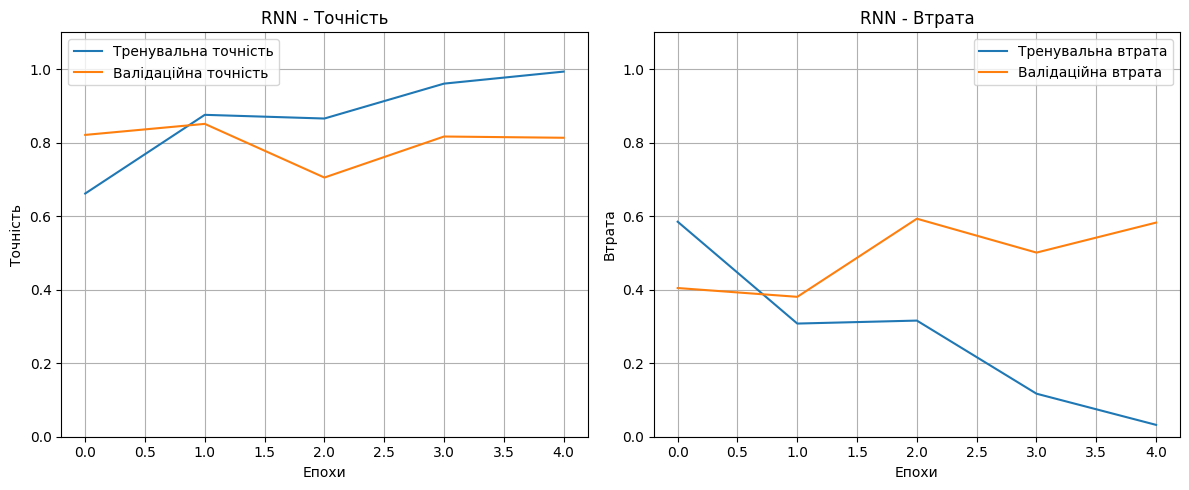

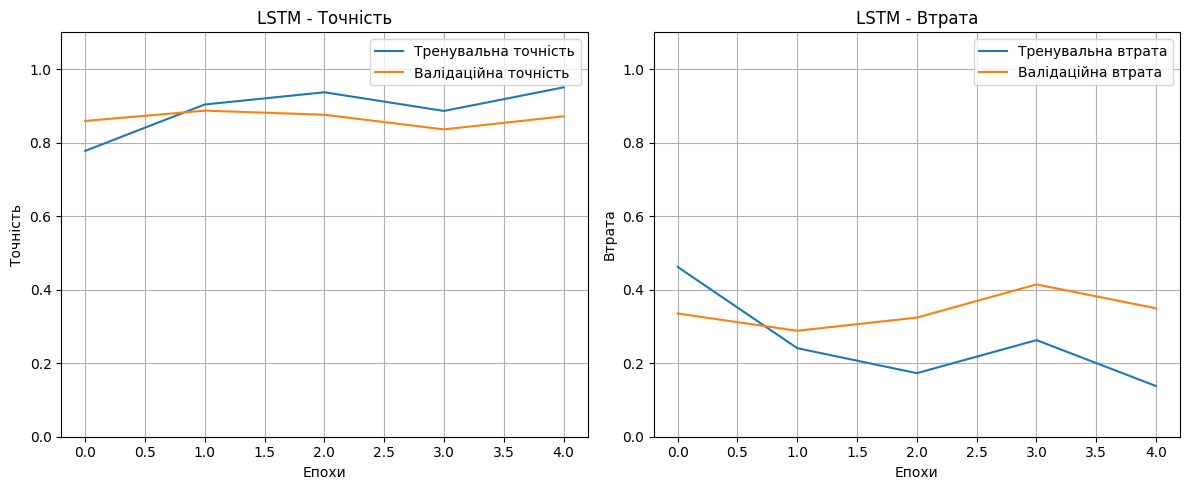

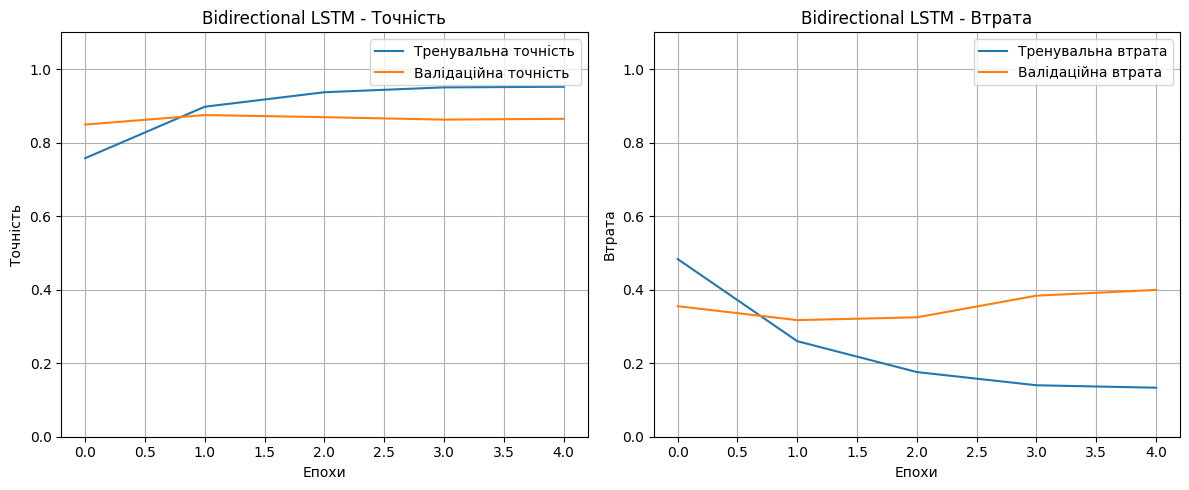

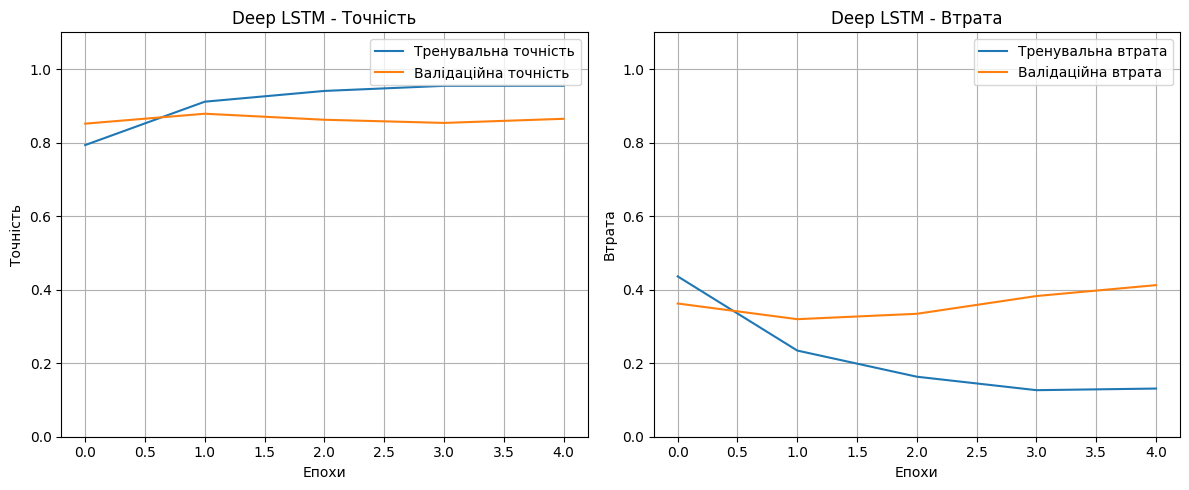

In [11]:
plot_history(rnn_history, 'RNN')
plot_history(lstm_history, 'LSTM')
plot_history(bidirectional_history, 'Bidirectional LSTM')
plot_history(deep_lstm_history, 'Deep LSTM')

In [12]:
def evaluate_model(model, X_val, y_val, model_name):
    loss, accuracy = model.evaluate(X_val, y_val)
    print(f'{model_name} - Втрата: {loss:.4f}, Точність: {accuracy:.4f}')

In [13]:
evaluate_model(rnn_model, X_test, y_test, 'RNN')
evaluate_model(lstm_model, X_test, y_test, 'LSTM')
evaluate_model(bidirectional_model, X_test, y_test, 'Bidirectional LSTM')
evaluate_model(deep_lstm_model, X_test, y_test, 'Deep LSTM')

782/782 [==============================] - 36s 46ms/step - loss: 0.3920 - accuracy: 0.8444
RNN - Втрата: 0.3920, Точність: 0.8444
782/782 [==============================] - 7s 8ms/step - loss: 0.3034 - accuracy: 0.8788
LSTM - Втрата: 0.3034, Точність: 0.8788
782/782 [==============================] - 12s 15ms/step - loss: 0.3316 - accuracy: 0.8679
Bidirectional LSTM - Втрата: 0.3316, Точність: 0.8679
782/782 [==============================] - 11s 14ms/step - loss: 0.3542 - accuracy: 0.8626
Deep LSTM - Втрата: 0.3542, Точність: 0.8626


In [14]:
def compare_models(models_and_histories):
    plt.figure(figsize=(10, 6))

    for model_name, history in models_and_histories.items():
        plt.plot(history.history['val_accuracy'], label=model_name)

    plt.title('Порівняння моделей')
    plt.xlabel('Епохи')
    plt.ylabel('Валідаційна точність')
    plt.legend()
    plt.ylim(0, 1.1)
    plt.show()

In [15]:
models_and_histories = {
    'RNN': rnn_history,
    'LSTM': lstm_history,
    'Bidirectional LSTM': bidirectional_history,
    'Deep LSTM': deep_lstm_history
}

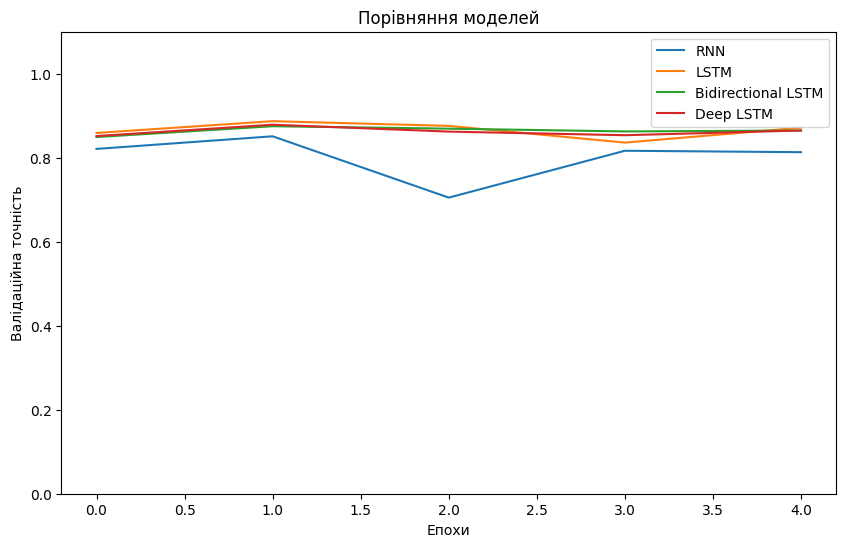

In [16]:
compare_models(models_and_histories)

**ПІДСУМКИ**

При навчанні моделей, кількість епох не призводить до покращення результатів, тож 5 достатньо

У даному випадку, модель **LSTM** показала найкращі результати на валідаційних даних Втрата: 0.3034, Точність: 0.8788

Моделі Bidirectional LSTM, Deep LSTM також показали приблизно такі результати, але трохи нижчі (Втрата: 0.3316, Точність: 0.8679) та (Втрата: 0.3542, Точність: 0.8626) відповідно




